In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr

In [4]:
# Load the data
df = pd.read_csv('data.csv')

# Column names
hang_col = 'How many times do you hang out with friends or family per week?'
mh_col = 'Rate your overall mental health.'

# Map hangout frequency to numeric codes
hang_map = {
    '0 times': 0,
    '1 -2 times': 1,
    '3 - 4 times': 2,
    '5 - 6 times': 3,
    '7+ times': 4
}
df['hang_code'] = df[hang_col].map(hang_map)
df['mh_rating'] = pd.to_numeric(df[mh_col])

# 1) Pearson correlation (hang_code vs mh_rating)
corr_df = df[['hang_code', 'mh_rating']].dropna()
r_hang, p_hang = pearsonr(corr_df['hang_code'], corr_df['mh_rating'])

# 2) Chi-square test (categorical hangout vs MH bins)
# Bin mental health into Low (1-2), Med (3), High (4-5)
bins = [0, 2, 3, 5]
labels = ['Negative', 'Neutral', 'Positive']
df['MH_cat'] = pd.cut(df['mh_rating'], bins=bins, labels=labels)

cont_hang = pd.crosstab(df[hang_col], df['MH_cat'])
chi2_hang, p_chi_hang, _, _ = chi2_contingency(cont_hang)

# Display results
print(f"Pearson correlation between hangout frequency (coded) and MH rating:\n"
      f"  r = {r_hang:.3f}, p-value = {p_hang:.3f}\n")
print("Chi-square test: hangout frequency vs. MH category")
print(f"  Chi² = {chi2_hang:.1f}, p-value = {p_chi_hang:.3f}")


Pearson correlation between hangout frequency (coded) and MH rating:
  r = 0.246, p-value = 0.002

Chi-square test: hangout frequency vs. MH category
  Chi² = 18.3, p-value = 0.019


### Explanation

These results indicate a significant positive correlation between hangout frequency and mental health rating, as seen by r = 0.246. This suggests that individuals who hang out more frequently report better mental health, which is supported by p = 0.002. Additionally, the Chi-squared test revealed a significant association between the two variables. Given both p-values, the probability that these are due to random chance is low.

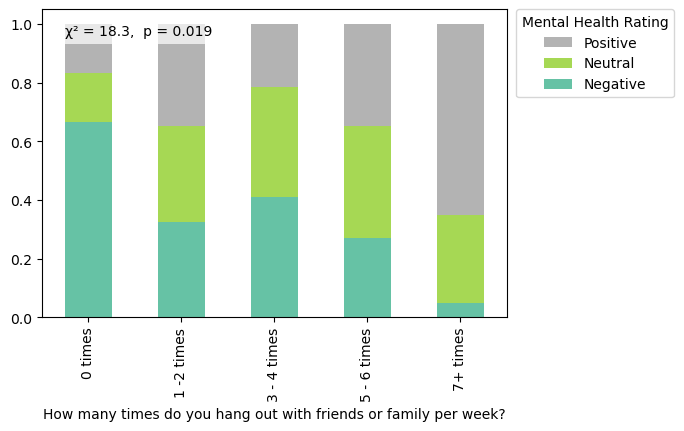

In [5]:
# (re-compute your 'prop' DataFrame here)
ct = pd.crosstab(df[hang_col], df['MH_cat'])
prop = ct.div(ct.sum(axis=1), axis=0)

chi2, p, dof, expected = chi2_contingency(ct)

# 2. Build your bar plot (as you already have):
ax = prop.plot(
    kind='bar',
    stacked=True,
    figsize=(6,4),
    colormap='Set2'
)

# 3. Annotate the statistic onto the plot
txt = f"χ² = {chi2:.1f},  p = {p:.3f}"
# Place at 5% from the left and 95% up in axes‐fraction coords:
ax.text(
    0.05, 0.95, txt,
    transform=ax.transAxes,
    va='top',
    ha='left',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
)

# grab the existing legend handles & labels
handles, labels = ax.get_legend_handles_labels()
# then re-create the legend in reverse order:
ax.legend(
    handles[::-1],
    labels[::-1],
    title='Mental Health Rating',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0
)

### Explanation

This visualization explains the relationship between the number of times someone hangs out with friends and family and how they rate their mental health. Students' observed mental health ratings are normally distributed, leading to the categorization these values. Mental health ratings [1,2] are placed into the negative category, [3] into the neutral category, and [4,5] into the positive category. 

After analyzing the proportions of students placed into each category, I observed that students who hang out with friends and family more than 7+ times a week are more likely to rate their mental health positively. In the group of people who hang out 0 times with friends and family per week, a significant proportion rated their mental health negatively.

In [6]:
soda_col = 'How often do you consume the following types of food or beverages in a week? [Sugary or carbonated sodas]'
mh_col   = 'Rate your overall mental health.'

freq_map = {
    'Never': 0,
    'Rarely (1–2 times a week)': 1,
    'Sometimes (3–4 times a week)': 2,
    'Often (5–6 times a week)': 3,
    'Daily': 4
}
df['soda_num'] = df[soda_col].map(freq_map)

# 2) Bin your MH rating into categories and encode them
bins = [0, 2, 3, 5]
labels = ['Low', 'Med', 'High']
df['MH_cat'] = pd.cut(df['mh_rating'], bins=bins, labels=labels)
mh_map = {'Low': 1, 'Med': 2, 'High': 3}
df['MH_cat_num'] = df['MH_cat'].map(mh_map)

# 3) Drop any rows with missing values in these two new columns
corr_df = df[['soda_num', 'MH_cat_num']].dropna()

# 4) Pearson correlation between soda consumption and MH category
r, p_corr = pearsonr(corr_df['soda_num'], corr_df['MH_cat_num'])

# 5) Chi-square for soda consumption vs. MH category
cont_soda = pd.crosstab(df[soda_col], df['MH_cat'])
chi2_soda, p_soda, _, _ = chi2_contingency(cont_soda)

# 6) Print results
print(f"Pearson correlation between soda consumption and MH category:\n"
      f"  r = {r:.3f}, p-value = {p_corr:.3f}\n")
print("Chi-square test: soda consumption vs. MH category")
print(f"  χ² = {chi2_soda:.1f}, p-value = {p_soda:.3f}")

Pearson correlation between soda consumption and MH category:
  r = 0.133, p-value = 0.094

Chi-square test: soda consumption vs. MH category
  χ² = 8.0, p-value = 0.438


### Explanation

These results show no significant relationship between the frequency with which someone consumes soda and how they rate their mental health. Neither test’s critical values are substantial enough to consider a relationship between these two variables.

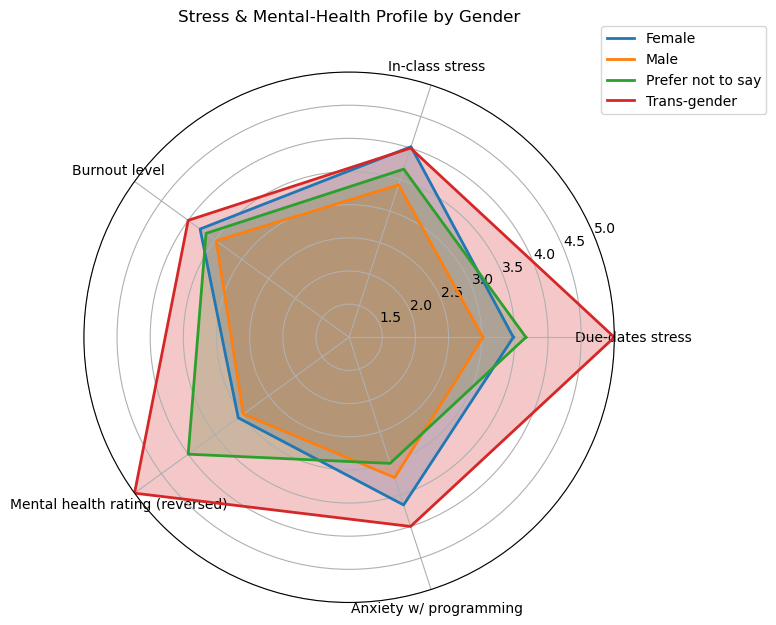

Stress mapping: {'Not at all stressed': 1, 'Rarely stressed': 2, 'Sometimes stressed': 3, 'Often stressed': 4, 'Always stressed': 5}
Anxiety mapping: {'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4, 'Always': 5}


In [7]:
# 2) Identify the relevant columns
gender_col   = [c for c in df.columns if 'gender' in c.lower()][0]
col_due      = [c for c in df.columns if 'take-home work' in c.lower()][0]
col_inclass  = [c for c in df.columns if 'in-class tests' in c.lower()][0]
col_burnout  = [c for c in df.columns if 'burnout' in c.lower()][0]
col_mh       = [c for c in df.columns if 'overall mental health' in c.lower()][0]
col_anx      = [c for c in df.columns if 'programming assignments?' in c.lower()][0]

# 3) Define ordinal mappings
stress_order = [
    'Not at all stressed',
    'Rarely stressed',
    'Sometimes stressed',
    'Often stressed',
    'Always stressed'
]
stress_map = {label: i+1 for i, label in enumerate(stress_order)}

anx_order = [
    'Never',
    'Rarely',
    'Sometimes',
    'Often',
    'Always'
]
anx_map = {label: i+1 for i, label in enumerate(anx_order)}

# 4) Convert to numeric
df['DueDates_num']     = df[col_due].map(stress_map)
df['InClass_num']      = df[col_inclass].map(stress_map)
df['Anxiety_num']      = df[col_anx].map(anx_map)
df['MentalHealth_num'] = pd.to_numeric(df[col_mh], errors='coerce')

# 5) Handle burnout (dynamic mapping if text)
if df[col_burnout].dtype == object:
    unique_burn = list(df[col_burnout].dropna().unique())
    burn_map = {val: i+1 for i, val in enumerate(unique_burn)}
    df['Burnout_num'] = df[col_burnout].map(burn_map)
else:
    df['Burnout_num'] = pd.to_numeric(df[col_burnout], errors='coerce')

# 6) Compute group means
grouped = df.groupby(gender_col).agg({
    'DueDates_num': 'mean',
    'InClass_num': 'mean',
    'Burnout_num': 'mean',
    'MentalHealth_num': 'mean',
    'Anxiety_num': 'mean'
}).reset_index()

# 7) Reverse mental health scale so higher = worse
grouped['MentalHealth_rev'] = 6 - grouped['MentalHealth_num']

# 8) Prepare for radar chart
categories = ['DueDates_num', 'InClass_num', 'Burnout_num', 'MentalHealth_rev', 'Anxiety_num']
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# 9) Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for _, row in grouped.iterrows():
    values = [row[c] for c in categories]
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=row[gender_col])
    ax.fill(angles, values, alpha=0.25)

# 10) Customize axes
ax.set_xticks(angles[:-1])
ax.set_xticklabels([
    'Due-dates stress',
    'In-class stress',
    'Burnout level',
    'Mental health rating (reversed)',
    'Anxiety w/ programming'
], wrap=True)
ax.set_ylim(1, 5)

# 11) Title & legend
ax.set_title('Stress & Mental-Health Profile by Gender', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

# 12) Show mapping dictionaries for reference
print("Stress mapping:", stress_map)
print("Anxiety mapping:", anx_map)
if 'burn_map' in locals():
    print("Burnout mapping (in order of appearance):", burn_map)

### Explanation

The purpose of this visualization is to observe the differences in average stress ratings between different genders. I observed that students who identify as transgender are overall more stressed across all categories. 

However, after analyzing the distributions of genders, I also observed that there is a disproportionate number of transgender students compared to male and female proportions.

Since their stress ratings have fewer observations than any other group, transgender students’ ratings are more likely to be uncertain. The same applies to females and labeled people prefer not to say. 

The mental health scale was reversed from the original data since a higher rating meant better mental health. However, in the spider chart, I want ratings consistent with high stress and negative mental health. So, the mental health values are reversed such that a lower rating places you closer to the edge of the axis.

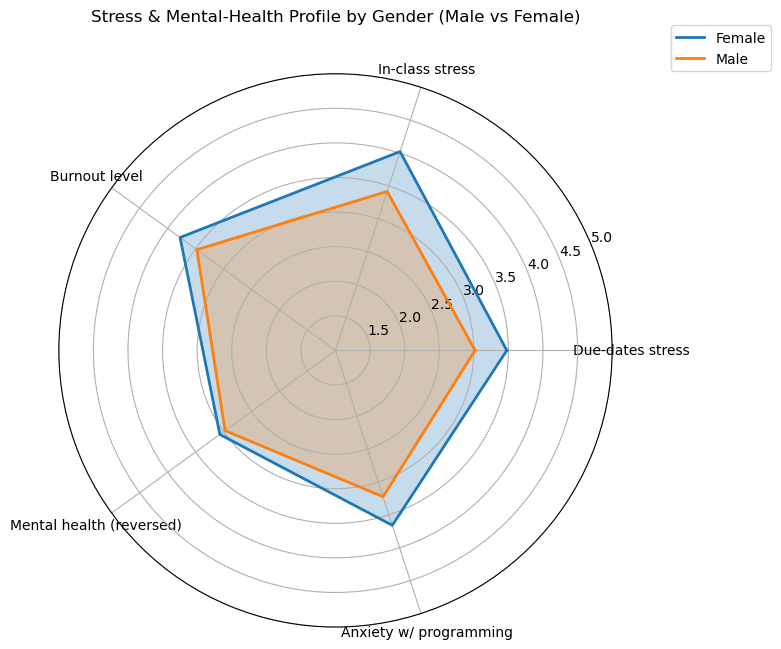

Stress mapping: {'Not at all stressed': 1, 'Rarely stressed': 2, 'Sometimes stressed': 3, 'Often stressed': 4, 'Always stressed': 5}
Anxiety mapping: {'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4, 'Always': 5}


In [8]:
# 2) Identify the relevant columns
gender_col  = [c for c in df.columns if 'gender' in c.lower()][0]
col_due     = [c for c in df.columns if 'take-home work' in c.lower()][0]
col_inclass = [c for c in df.columns if 'in-class tests' in c.lower()][0]
col_burnout = [c for c in df.columns if 'burnout' in c.lower()][0]
col_mh      = [c for c in df.columns if 'overall mental health' in c.lower()][0]
col_anx     = [c for c in df.columns if 'programming assignments' in c.lower()][0]

# 3) Define ordinal mappings
stress_order = ['Not at all stressed', 'Rarely stressed', 'Sometimes stressed', 'Often stressed', 'Always stressed']
anx_order    = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
stress_map   = {label: i+1 for i, label in enumerate(stress_order)}
anx_map      = {label: i+1 for i, label in enumerate(anx_order)}

# 4) Convert to numeric
df['DueDates_num']     = df[col_due].map(stress_map)
df['InClass_num']      = df[col_inclass].map(stress_map)
df['Anxiety_num']      = df[col_anx].map(anx_map)
df['MentalHealth_num'] = pd.to_numeric(df[col_mh], errors='coerce')

# 5) Handle burnout (text or numeric)
if df[col_burnout].dtype == object:
    burn_map = {val: i+1 for i, val in enumerate(df[col_burnout].dropna().unique())}
    df['Burnout_num'] = df[col_burnout].map(burn_map)
else:
    df['Burnout_num'] = pd.to_numeric(df[col_burnout], errors='coerce')

# 6) Filter to only Male and Female
df = df[df[gender_col].isin(['Male', 'Female'])]

# 7) Compute group means
grouped = df.groupby(gender_col).agg({
    'DueDates_num':     'mean',
    'InClass_num':      'mean',
    'Burnout_num':      'mean',
    'MentalHealth_num': 'mean',
    'Anxiety_num':      'mean'
}).reset_index()

# 8) Reverse mental health scale so higher = worse
grouped['MentalHealth_rev'] = 6 - grouped['MentalHealth_num']

# 9) Prepare for radar chart
categories = ['DueDates_num', 'InClass_num', 'Burnout_num', 'MentalHealth_rev', 'Anxiety_num']
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close loop

# 10) Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for _, row in grouped.iterrows():
    vals = [row[c] for c in categories] + [row[categories[0]]]
    ax.fill(angles, vals, alpha=0.25)
    ax.plot(angles, vals, linewidth=2, linestyle='solid', label=row[gender_col])

# 11) Customize axes
ax.set_xticks(angles[:-1])
ax.set_xticklabels([
    'Due-dates stress',
    'In-class stress',
    'Burnout level',
    'Mental health (reversed)',
    'Anxiety w/ programming'
], wrap=True)
ax.set_ylim(1, 5)

# 12) Title & legend
ax.set_title('Stress & Mental-Health Profile by Gender (Male vs Female)', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

# 13) Mapping references
print("Stress mapping:", stress_map)
print("Anxiety mapping:", anx_map)
if 'burn_map' in locals():
    print("Burnout mapping:", burn_map)

### Explanation

Here is the same spider chart without the disproportionate groups.

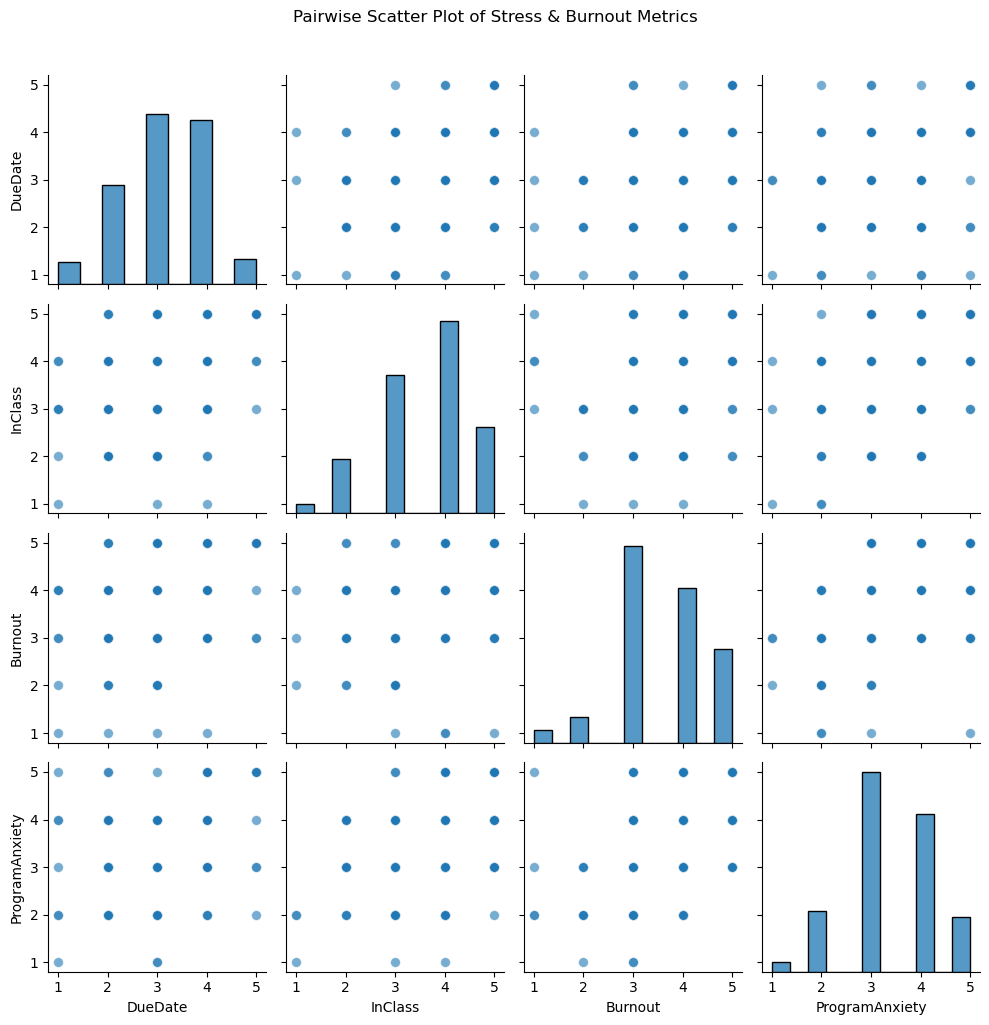

In [10]:
# 2) Identify the relevant columns
gender_col  = [c for c in df.columns if 'gender' in c.lower()][0]
col_due     = [c for c in df.columns if 'take-home work' in c.lower()][0]
col_inclass = [c for c in df.columns if 'in-class tests' in c.lower()][0]
col_burnout = [c for c in df.columns if 'burnout' in c.lower()][0]
col_anx     = [c for c in df.columns if 'programming assignments' in c.lower()][0]

# 3) Define ordinal mappings
stress_order = [
    'Not at all stressed',
    'Rarely stressed',
    'Sometimes stressed',
    'Often stressed',
    'Always stressed'
]
stress_map = {label: i+1 for i, label in enumerate(stress_order)}

anx_order = [
    'Never',
    'Rarely',
    'Sometimes',
    'Often',
    'Always'
]
anx_map = {label: i+1 for i, label in enumerate(anx_order)}

# 4) Convert to numeric
df['DueDate'] = df[col_due].map(stress_map)
df['InClass']  = df[col_inclass].map(stress_map)
df['ProgramAnxiety']  = df[col_anx].map(anx_map)

# 5) Handle burnout (text or numeric)
if df[col_burnout].dtype == object:
    burn_map = {val: i+1 for i, val in enumerate(df[col_burnout].dropna().unique())}
    df['Burnout'] = df[col_burnout].map(burn_map)
else:
    df['Burnout'] = pd.to_numeric(df[col_burnout], errors='coerce')

# 6) Build and clean DataFrame for plotting
plot_df = df[['DueDate', 'InClass', 'Burnout', 'ProgramAnxiety']]
plot_df = plot_df.dropna().astype(float)

# 7) Create the scatterplot matrix (hist on diagonal)
sns.pairplot(
    plot_df,
    diag_kind="hist",
    plot_kws={'alpha': 0.6, 's': 50}
)
plt.suptitle("Pairwise Scatter Plot of Stress & Burnout Metrics", y=1.02)
plt.tight_layout()
plt.show()

### Explanation

The purpose of this visualization is to observe relationships between different stress metric variables. 

Since data points are on a 1-5 scale, data points with a heavier color density mean more observations were observed for that combination of ratings for the observed variables.  A linear trend seems to exist between how students rate anxiety associated with programming assignments and their reported burnout levels. Higher rates of burnout seem to be related to higher programming anxiety, and lower rates of burnout are associated with less programming anxiety. 

However, after observing the histograms for each variable, we noticed that most subjects rated their programming anxiety and burnout as high anyway. Since programming anxiety and burnout observations are skewed, we cannot immediately conclude that this is a significant relationship without statistical tests. Since the population is skewed, we should observe the proportions of each group if we were to test. 

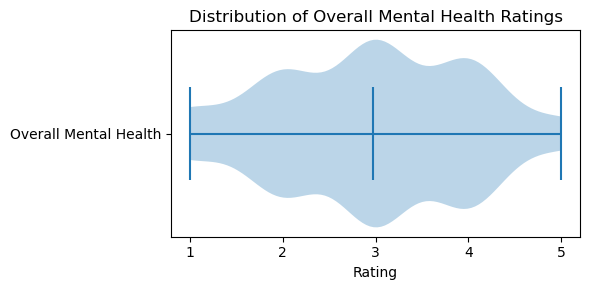

In [12]:
# Identify the "Rate your overall mental health" column
mh_col = next(col for col in df.columns if 'Rate your overall mental health' in col)

# Drop missing and map categories to numeric if needed
series = df[mh_col].dropna()
if pd.api.types.is_numeric_dtype(series):
    data = series.values
    ticks = sorted(series.unique())
    labels = ticks
else:
    # Infer ordering from appearance
    categories = list(dict.fromkeys(series))
    mapping = {cat: i + 1 for i, cat in enumerate(categories)}
    data = series.map(mapping).dropna().values
    ticks = list(mapping.values())
    labels = list(mapping.keys())

# Plot horizontal violin
plt.figure(figsize=(6, 3))
plt.violinplot(data, positions=[0], vert=False, showmeans=True, widths=0.6)

# Format axes
plt.yticks([0], ['Overall Mental Health'])
plt.xlabel('Rating')
plt.xticks(ticks, labels)
plt.title('Distribution of Overall Mental Health Ratings')
plt.tight_layout()
plt.show()


### Explanation

In this visualization I was experimenting with a violin chart to observe how students rated their mental health across all rating groups. I noticed here that the responses formed a normal distribution which led me to use this variable to observe relationships.

Correlation between consumption and stress level: 0.063


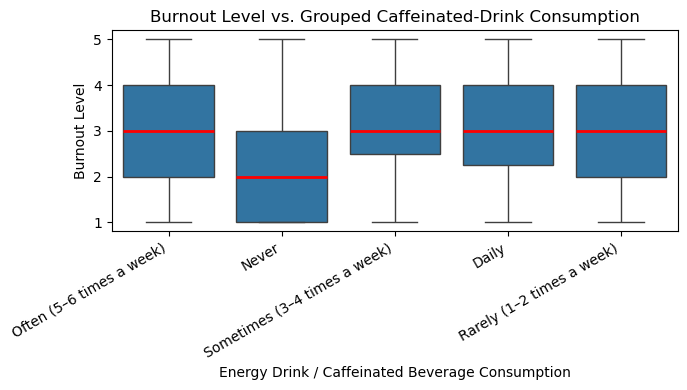

In [11]:
# your stress question
df = pd.read_csv('data.csv')

stress_col = 'Rate your overall mental health.'

# the new drink question 
caff_col = 'How often do you consume the following types of food or beverages in a week? [Sugary snacks or desserts]'

# Create mappings
consumption_map = {
    'Never': 0,
    'Rarely (1–2 times a week)': 1, 
    'Sometimes (3–4 times a week)': 2,
    'Often (5–6 times a week)': 3,
    'Daily': 4
}

# Convert categories to numeric values
x = pd.Series([consumption_map[val] for val in df[caff_col]])
y = pd.Series(df[stress_col])

# Compute correlation
correlation = x.corr(y)
print(f'Correlation between consumption and stress level: {correlation:.3f}')

# Create boxplot
plt.figure(figsize=(7,4))
sns.boxplot(
    data=df,
    x=caff_col,
    y=stress_col,
    medianprops={'color':'red','linewidth':2}
)

plt.xlabel("Energy Drink / Caffeinated Beverage Consumption")
plt.ylabel("Burnout Level")
plt.title("Burnout Level vs. Grouped Caffeinated-Drink Consumption")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

### Explanation

In this visualization, I wanted to explore if caffeine consumption had a significant relationship with burnout rating. I computed the correlation coefficient along with a bar and whisker plot which resulted in no significant relationship being observed since the correlation coefficient was too low and the graph showed no difference between consumption groups.

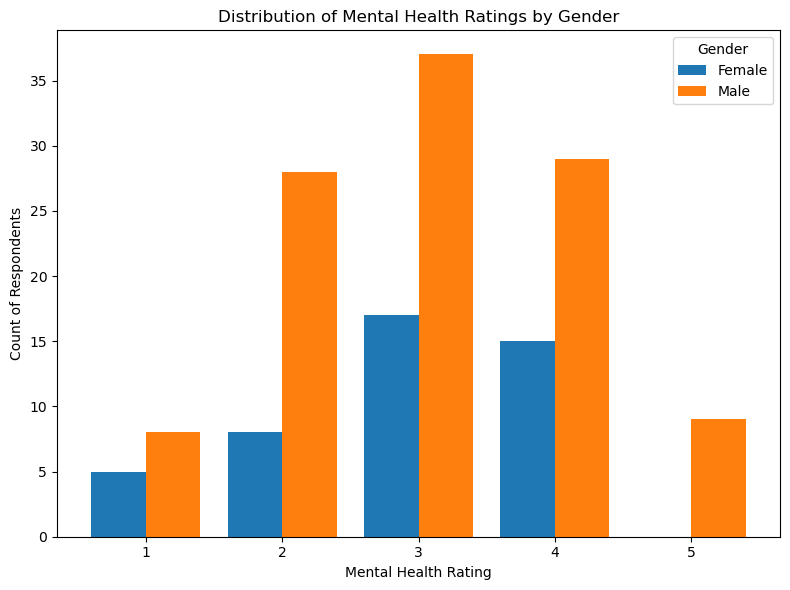

In [13]:
# 2) Identify the relevant columns
gender_col = [c for c in df.columns if 'gender' in c.lower()][0]
col_mh     = [c for c in df.columns if 'overall mental health' in c.lower()][0]

# 3) Convert mental health ratings to numeric
df['MH_num'] = pd.to_numeric(df[col_mh], errors='coerce')

# 4) Filter for Male and Female respondents
df_mf = df[df[gender_col].isin(['Male', 'Female'])].copy()

# 5) Compute count of each rating by gender
counts = df_mf.pivot_table(
    index='MH_num',
    columns=gender_col,
    aggfunc='size',
    fill_value=0
).reindex([1, 2, 3, 4, 5], fill_value=0)

# 6) Plot grouped bar chart
ax = counts.plot(
    kind='bar',
    figsize=(8, 6),
    width=0.8
)
ax.set_xlabel('Mental Health Rating')
ax.set_ylabel('Count of Respondents')
ax.set_title('Distribution of Mental Health Ratings by Gender')
ax.legend(title='Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Explanation

This visualization compares the distribution of mental health ratings between Males and Females. However, since the groups are disproportionate, it would probably be better to analyze the proportions of Males and Females in each rating group.